In [1]:
%%time
import cv2
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

CPU times: user 102 ms, sys: 16.7 ms, total: 119 ms
Wall time: 258 ms


In [2]:
img = cv2.imread('data/2upc.jpg')

In [3]:
def cont_hi(num_img):
        #num_img = asarray(img)
        #num_img.setflags(write=1)
        for i in range(0 , len(num_img)):
            for j in range(0, len(num_img[i]) ):
                #if num_img[i][j][0] <= 200  and num_img[i][j][1] <= 200 and num_img[i][j][2] <= 200:
                mean1 = np.mean(num_img[i][j])
                #mean1_lst.append(mean1)
                if mean1 < 180: #180:
                    num_img[i][j][0] = mean1
                    num_img[i][j][1] = mean1
                    num_img[i][j][2] = mean1
                else:
                    num_img[i][j][0] = 255
                    num_img[i][j][1] = 255
                    num_img[i][j][2] = 255
        #img = Image.fromarray(num_img)
        return num_img

CPU times: user 9.93 s, sys: 4.18 ms, total: 9.93 s
Wall time: 9.94 s


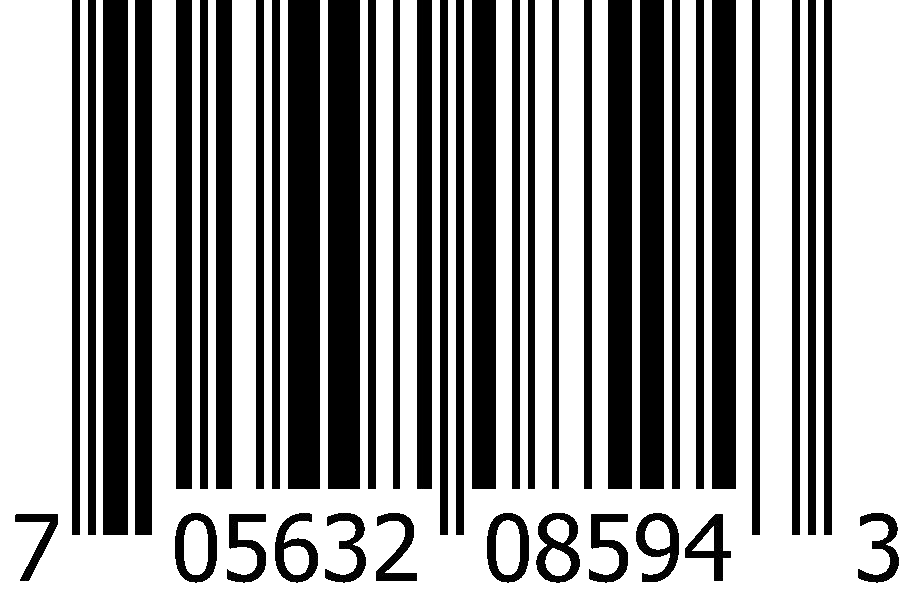

In [4]:
%%time
img = cont_hi(img)
#img = defs.img2txt.thresholding(img)
cv2.imwrite('bar1.jpg',img)
Image.fromarray(img)

In [5]:
img = cv2.imread('bar1.jpg')
h,l,m = np.shape(img)
h,l,m

(591, 905, 3)

In [6]:
%%time
arr = []
#for i in range(0, len(img)):
#for i in range(round(h/2), round(h/2)+1):  # 100th row is selected
for i in range(80,81):  # 100th row is selected    
    for j in range(0, len(img[i])):        # read all columns in 100th row
        if np.mean(img[i][j]) >= 100:      #
            arr.append(1)                  # white
        else:
            arr.append(0)                  # black
print(len(arr))
print(arr)

905
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,

In [7]:
%%time
df = pd.DataFrame(arr, columns=['val'])
df = df.groupby([df['val'].ne(df['val'].shift()).cumsum(), 'val']).size()
df = df.reset_index(level=0, drop=True)
#print(df)
df = pd.DataFrame(df)
df = df.reset_index()
df.columns = ['val','count']
df

CPU times: user 7.82 ms, sys: 4.93 ms, total: 12.7 ms
Wall time: 23.4 ms


,val,count
0,1,72
1,0,8
2,1,8
3,0,8
4,1,7
...,...,...
56,1,8
57,0,8
58,1,8
59,0,8


In [8]:
%%time
#REMOVE WHITE==============KEEP BLACK=======
df0 = df.copy()
for i in range(0, len(df0['val']) ):
    if df0['val'][i] == 1:
        df0.drop([i], inplace = True)

df0 = df0.reset_index(level=0, drop=True)

#REMOVE BLACK==============KEEP WHITE========
df1 = df.copy()
for i in range(0, len(df1['val']) ):
    if df1['val'][i] == 0:
        df1.drop([i], inplace = True)

df1 = df1.reset_index(level=0, drop=True)

CPU times: user 40.8 ms, sys: 6.21 ms, total: 47 ms
Wall time: 41.3 ms


In [9]:
df0

,val,count
0,0,8
1,0,8
2,0,25
3,0,17
4,0,16
5,0,8
6,0,16
7,0,8
8,0,8
9,0,32


In [10]:
df1

,val,count
0,1,72
1,1,8
2,1,7
3,1,7
4,1,24
5,1,8
6,1,8
7,1,24
8,1,8
9,1,8


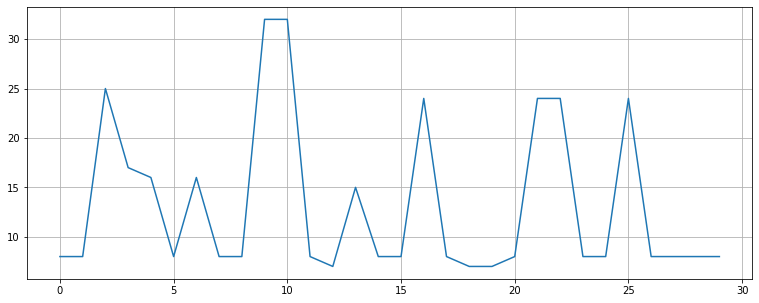

In [11]:
plt.figure(figsize=(13,5))
plt.plot(df0['count'])
plt.grid()

# these limits are to be changed as per the graph above.
# one might also consider resizing the images to a fixed size to normalize to some extent.
# the same will be done in later versions.

In [12]:
%%time
#these limits are to be changed as per the graph above.
#one might also consider resizing the images to a fixed size to normalize to some extent.
arrb = []
for i in range(0, len(df0['val'])):
    
    if df0['count'][i] <= 12:
        arrb.append(1)
        
    elif df0['count'][i] > 12 and df0['count'][i] <= 20:
        arrb.append(2)
        
    elif df0['count'][i] > 20 and df0['count'][i] <= 25:
        arrb.append(3)
        
    elif df0['count'][i] > 25 and df0['count'][i] <= 50:
        arrb.append(4)

print(arrb)

[1, 1, 3, 2, 2, 1, 2, 1, 1, 4, 4, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1]
CPU times: user 983 µs, sys: 0 ns, total: 983 µs
Wall time: 990 µs


CPU times: user 25.8 ms, sys: 0 ns, total: 25.8 ms
Wall time: 25.8 ms


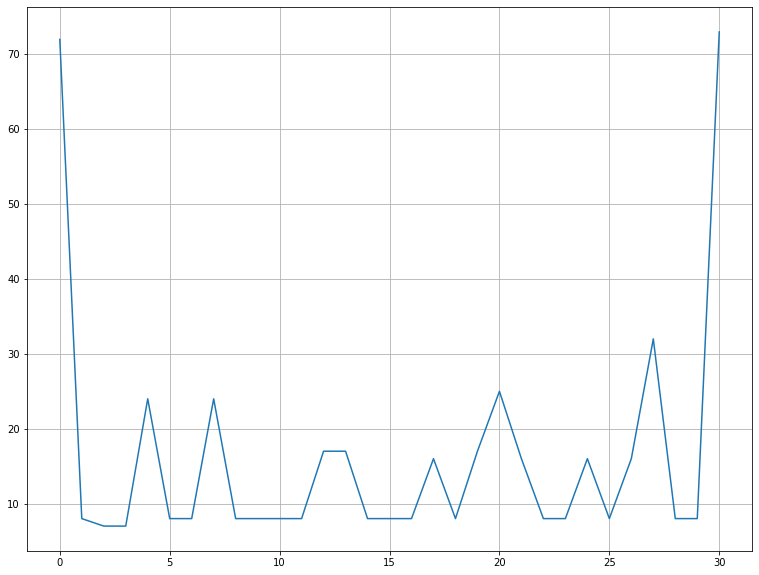

In [13]:
%%time
plt.figure(figsize=(13,10))
plt.plot(df1['count'])
plt.grid()

In [14]:
%%time
arrw = []
for i in range(0, len(df1['val'])):
    
    if df1['count'][i] <= 10:
        arrw.append(1)
        
    elif df1['count'][i] > 10 and df1['count'][i] <= 20:
        arrw.append(2)
        
    elif df1['count'][i] > 20 and df1['count'][i] <= 30:
        arrw.append(3)
        
    elif df1['count'][i] > 30 and df1['count'][i] <= 120:
        arrw.append(4)
         
print(arrw)

[4, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 3, 2, 1, 1, 2, 1, 2, 4, 1, 1, 4]
CPU times: user 1.3 ms, sys: 17 µs, total: 1.31 ms
Wall time: 1.32 ms


In [15]:
%%time
arr = []

for i in range(0, len(arrb)):
    arr.append(arrw[i])
    arr.append(arrb[i])
arr.append(arrw[len(arrw)-1])
print(arr)
print(len(arr))

[4, 1, 1, 1, 1, 3, 1, 2, 3, 2, 1, 1, 1, 2, 3, 1, 1, 1, 1, 4, 1, 4, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 2, 1, 3, 1, 2, 3, 1, 3, 1, 1, 2, 1, 1, 3, 2, 1, 4, 1, 1, 1, 1, 1, 4]
61
CPU times: user 182 µs, sys: 10 µs, total: 192 µs
Wall time: 151 µs


In [16]:
arr = arr[4:-4]
print(arr)
print(len(arr))

[1, 3, 1, 2, 3, 2, 1, 1, 1, 2, 3, 1, 1, 1, 1, 4, 1, 4, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 2, 1, 3, 1, 2, 3, 1, 3, 1, 1, 2, 1, 1, 3, 2, 1, 4, 1, 1]
53


In [17]:
arr.pop(24); arr.pop(24); arr.pop(24); arr.pop(24); arr.pop(24); 
print(arr)
print(len(arr))

[1, 3, 1, 2, 3, 2, 1, 1, 1, 2, 3, 1, 1, 1, 1, 4, 1, 4, 1, 1, 2, 1, 2, 2, 3, 2, 1, 1, 1, 2, 1, 3, 1, 2, 3, 1, 3, 1, 1, 2, 1, 1, 3, 2, 1, 4, 1, 1]
48


In [18]:
j=-4
arr1 = []
while j < len(arr)-4:
    j  = j+4
    print(str(j) +' '+ str(j+1) +' '+ str(j+2) +' '+ str(j+3))
    arr1.append( [( str(arr[j]) + str(arr[j+1]) + str(arr[j+2]) + str(arr[j+3]) )] )
print(arr1)

0 1 2 3
4 5 6 7
8 9 10 11
12 13 14 15
16 17 18 19
20 21 22 23
24 25 26 27
28 29 30 31
32 33 34 35
36 37 38 39
40 41 42 43
44 45 46 47
[['1312'], ['3211'], ['1231'], ['1114'], ['1411'], ['2122'], ['3211'], ['1213'], ['1231'], ['3112'], ['1132'], ['1411']]


## FINAL CODE

In [19]:
code = []
for i in range(0, len(arr1)):
    if arr1[i][0]== '3211':
        code.append('0')
    elif arr1[i][0]== '2221':
        code.append('1')
    elif arr1[i][0]== '2122':
        code.append('2')
    elif arr1[i][0]== '1411':
        code.append('3')
    elif arr1[i][0]== '1132':
        code.append('4')
    elif arr1[i][0]== '1231':
        code.append('5')
    elif arr1[i][0]== '1114':
        code.append('6')
    elif arr1[i][0]== '1312':
        code.append('7')
    elif arr1[i][0]== '1213':
        code.append('8')
    elif arr1[i][0]== '3112':
        code.append('9')
    else:
        code.append('R')

code = ''.join(code)
print('\nCODE: ',code)


CODE:  705632085943


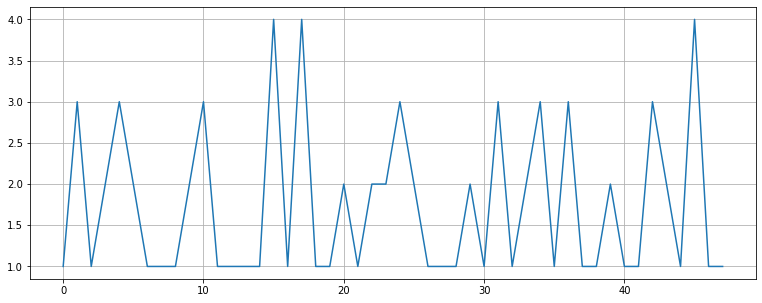

In [20]:
plt.figure(figsize=(13,5))
plt.plot(arr)
plt.grid()

In [21]:
rrr = [1,2,3,4,5]
rrr.pop(1);rrr.pop(1);rrr.pop(1)
rrr

[1, 5]